In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np

try:
    from data.generated.generated_data import *
except ModuleNotFoundError:
    from generated_data import *
    
# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline
%config IPCompleter.greedy=True


In [2]:
x,y = generate_noisy_nonlinear_dataset()
x,_,y,_,nn_y = get_noisy_nonlinear_with_non_noisy_labels()
print(x.shape)
columns = []
for i in range(x.shape[1]):
    columns.append("feature_"+str(i))
df = pd.DataFrame(x, columns=columns)
df['target'] = pd.Series(y)

label = 'target'

(2800, 10)


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_0  2800 non-null   float64
 1   feature_1  2800 non-null   float64
 2   feature_2  2800 non-null   float64
 3   feature_3  2800 non-null   float64
 4   feature_4  2800 non-null   float64
 5   feature_5  2800 non-null   float64
 6   feature_6  2800 non-null   float64
 7   feature_7  2800 non-null   float64
 8   feature_8  2800 non-null   float64
 9   feature_9  2800 non-null   float64
 10  target     2800 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 240.8 KB


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,0.018881,0.032142,0.010099,0.005358,0.018896,0.012157,0.009862,0.009714,0.019813,0.036460,0.501786
std,0.054229,0.061011,0.029535,0.025220,0.055354,0.042406,0.033882,0.026809,0.048963,0.072881,0.500086
min,0.000021,0.000021,0.000010,0.000005,0.000013,0.000037,0.000008,0.000013,0.000009,0.000023,0.000000
25%,0.000965,0.002463,0.000570,0.000272,0.000835,0.000686,0.000553,0.000648,0.002003,0.003676,0.000000
50%,0.003259,0.012182,0.002738,0.000721,0.003250,0.001785,0.002576,0.002829,0.007226,0.013537,1.000000
75%,0.014493,0.036155,0.010169,0.002574,0.015149,0.006365,0.008614,0.009698,0.020154,0.038765,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


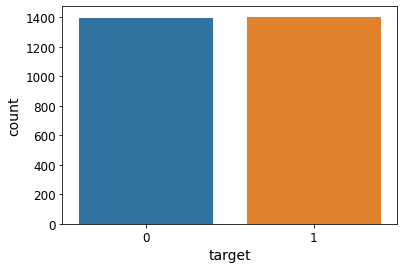

target
0    0.498214
1    0.501786
Name: target, dtype: float64


In [4]:
sns.countplot(x=label, data=df)
plt.show()
print(df.groupby(label)[label].apply(lambda x: x.count()/df.shape[0]))

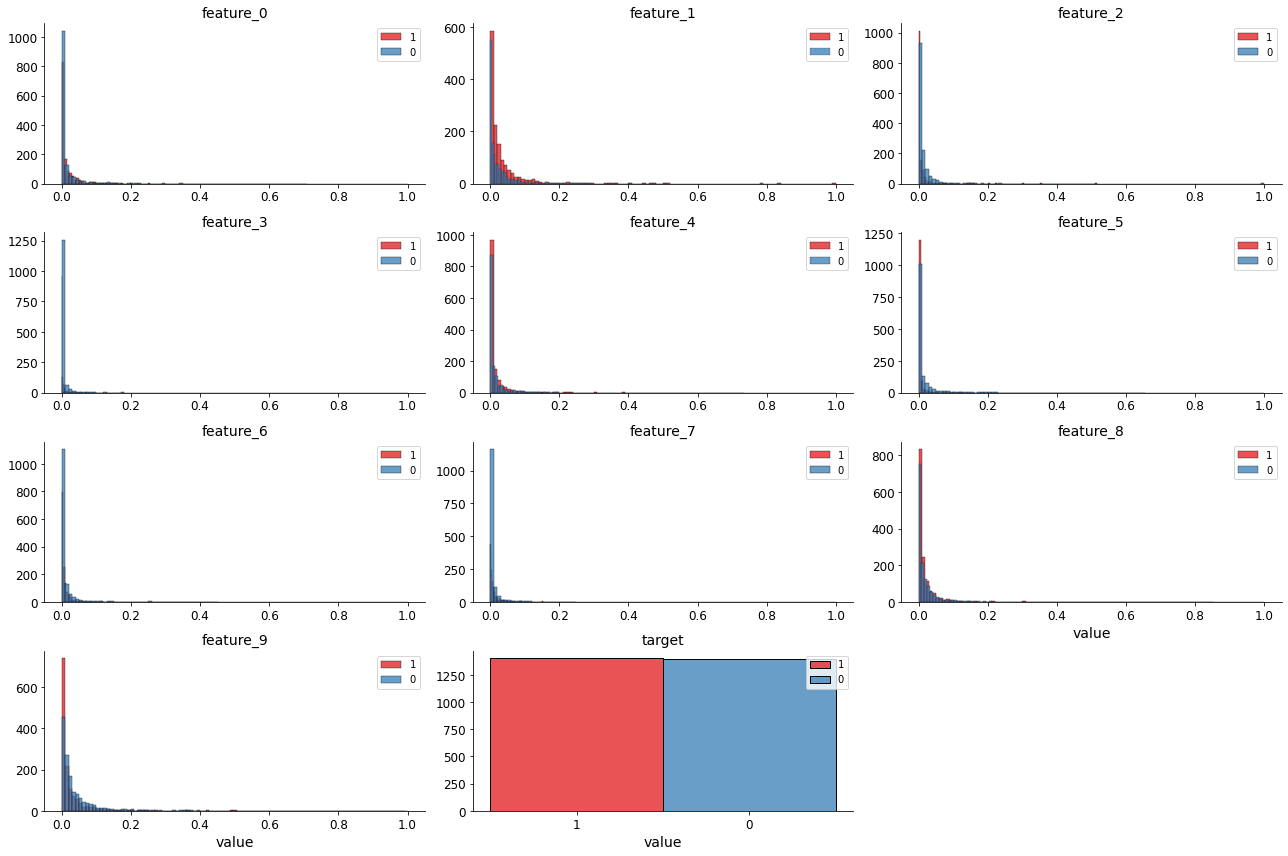

In [5]:
new_df = df.copy()
new_df[label] = new_df[label].map({0: '0', 1:'1'})
new_df['target_index'] = new_df[label]

# plot code from https://stackoverflow.com/questions/45883598/pandas-histogram-df-hist-group-by
df2 = pd.melt(new_df, id_vars='target_index', value_vars=new_df.drop("target_index", axis=1).columns, value_name='value')

g = sns.FacetGrid(df2, col="variable", hue="target_index", palette="Set1", col_wrap=3, sharex=False, sharey=False, aspect=2)
g.map(sns.histplot, 'value', bins=100)
for a in g.axes:
    a.legend()

# Found at https://github.com/mwaskom/seaborn/issues/440
plt.setp(g.fig.texts, text="")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
plt.show()


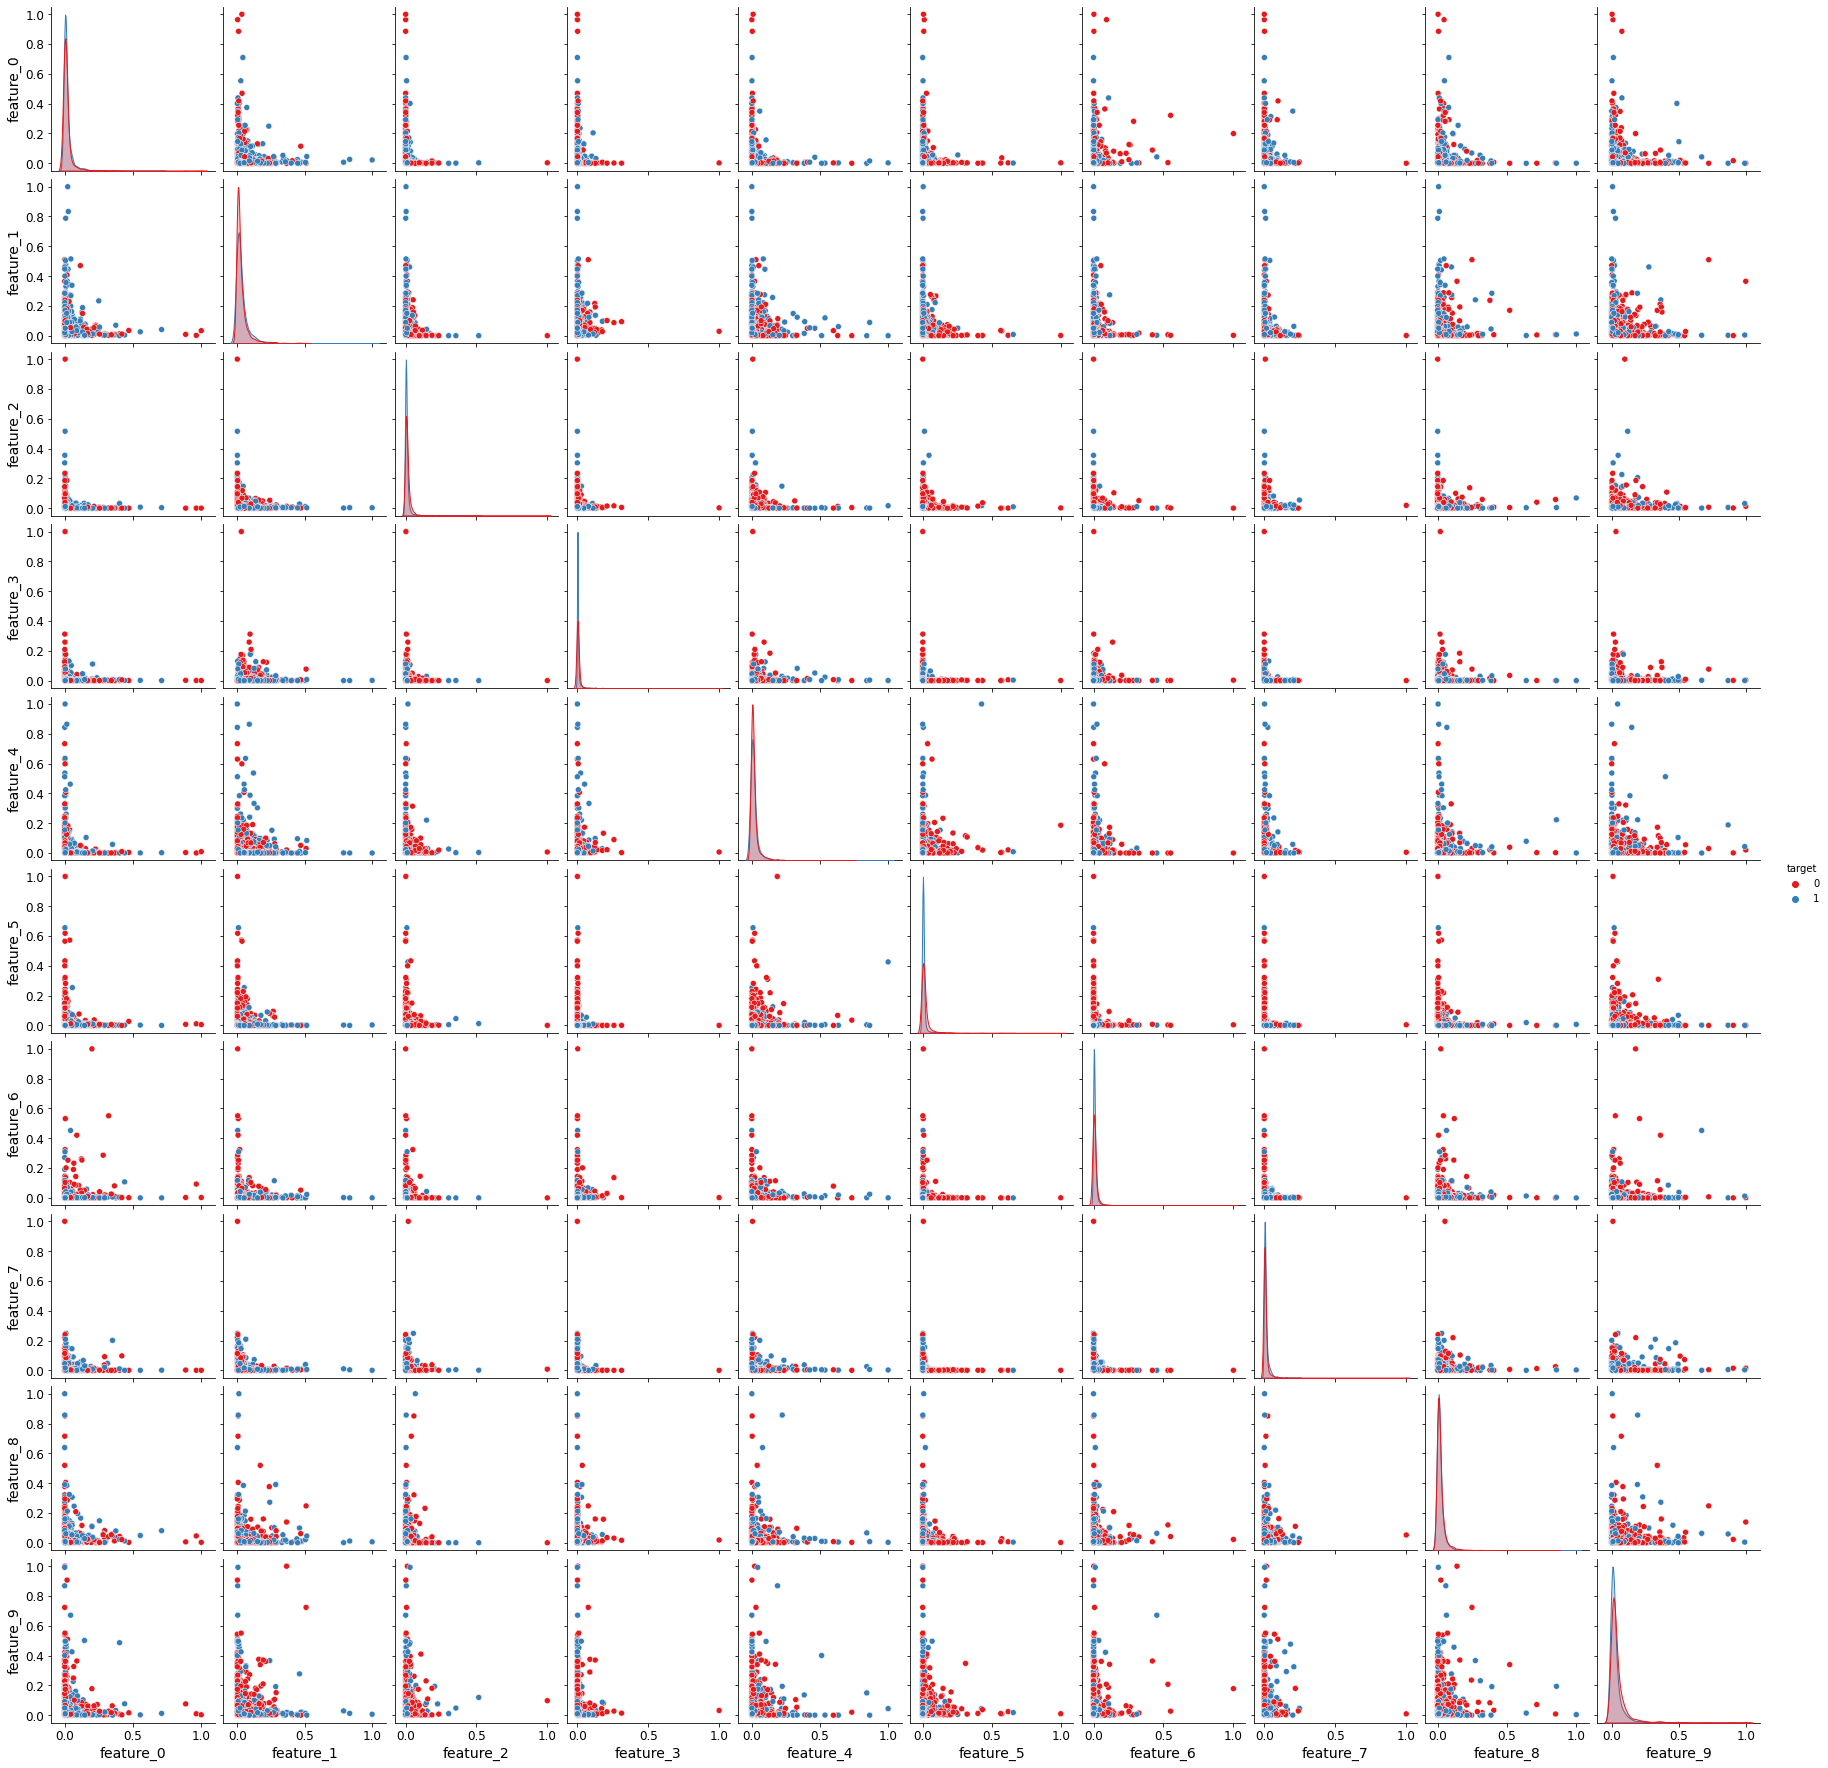

In [6]:
if True:
    # Takes a long time to run
    new_df = df.copy()
    sns.pairplot(new_df, hue=label, palette="Set1")

In [7]:
corr_matrix = df.corr()
corr_matrix[label].sort_values(ascending=False)

target       1.000000
feature_1    0.080335
feature_7    0.078253
feature_4    0.023420
feature_0    0.012063
feature_8   -0.018576
feature_3   -0.033460
feature_6   -0.037956
feature_2   -0.090452
feature_9   -0.091342
feature_5   -0.132467
Name: target, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = get_noisy_nonlinear()
print(X_train.shape)

(2800, 10)


In [9]:
import common_data_analysis

KFold_Score, classifiers, time_taken = common_data_analysis.kfolds_basic_test_all_classifiers(X_train, y_train, scoring="accuracy")

Running: rbf SVM
Time Taken: 0.5549955368041992
Running: NeuralNetwork


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Time Taken: 12.682731866836548
Running: DecisionTree
Time Taken: 0.1400737762451172
Running: KNeighborsClassifier
Time Taken: 0.15161705017089844
Running: RandomForestClassifier
Time Taken: 4.336935043334961
Running: AdaBoost
Time Taken: 1.1771340370178223
Final Time elapsed 19.044072151184082


In [10]:
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.842857,0.880357,0.848214,0.860714,0.835714,0.853571
AdaBoost,0.783929,0.830357,0.817857,0.808929,0.810714,0.810357
KNeighborsClassifier,0.773214,0.758929,0.767857,0.776786,0.782143,0.771786
rbf SVM,0.762500,0.758929,0.776786,0.760714,0.778571,0.767500
NeuralNetwork,0.760714,0.760714,0.766071,0.757143,0.775000,0.763929
DecisionTree,0.717857,0.746429,0.758929,0.766071,0.707143,0.739286


[0.49928571 0.50071429]
Number of Instances 2800
rbf SVM 		0.5550525188446045 seconds
NeuralNetwork 		12.683036804199219 seconds
DecisionTree 		0.14012408256530762 seconds
KNeighborsClassifier 		0.15166950225830078 seconds
RandomForestClassifier 		4.3369951248168945 seconds
AdaBoost 		1.1771905422210693 seconds


In [11]:
common_data_analysis.print_kfolds_basic_test_results(KFold_Score, classifiers, y_train)
print("Number of Instances {}".format(len(X_train)))
for t, c in zip(time_taken, classifiers):
    print("{} \t\t{} seconds".format(c, t))

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
RandomForestClassifier,0.842857,0.880357,0.848214,0.860714,0.835714,0.853571
AdaBoost,0.783929,0.830357,0.817857,0.808929,0.810714,0.810357
KNeighborsClassifier,0.773214,0.758929,0.767857,0.776786,0.782143,0.771786
rbf SVM,0.762500,0.758929,0.776786,0.760714,0.778571,0.767500
NeuralNetwork,0.760714,0.760714,0.766071,0.757143,0.775000,0.763929
DecisionTree,0.717857,0.746429,0.758929,0.766071,0.707143,0.739286


[0.49928571 0.50071429]
Number of Instances 2800
rbf SVM 		0.5550525188446045 seconds
NeuralNetwork 		12.683036804199219 seconds
DecisionTree 		0.14012408256530762 seconds
KNeighborsClassifier 		0.15166950225830078 seconds
RandomForestClassifier 		4.3369951248168945 seconds
AdaBoost 		1.1771905422210693 seconds
